<a href="https://colab.research.google.com/github/v0rt3xxxx/Statistical-Theory-Final-Project/blob/main/Spotify_Track_Popularity_Analysis_Combined_Preserved_Structure_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify Track Popularity Analysis

## 1. Importing Libraries and Loading Data

In [2]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Load dataset
spotify_df = pd.read_csv("spotify_tracks.csv")

# Display the first few rows to understand the structure
spotify_df.head()


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,04-Apr,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,04-Apr,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,05-Apr,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,04-Apr,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,04-Apr,0.390


## 2. Data Cleaning and Preprocessing

In [3]:

# Remove duplicates and handle missing values
spotify_df = spotify_df.drop_duplicates()
spotify_df = spotify_df.dropna()

# Standardizing numerical audio_features
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
scaler = StandardScaler()
spotify_df[audio_features] = scaler.fit_transform(spotify_df[audio_features])

# Create a binary variable for popularity
median_popularity = spotify_df['popularity'].median()
spotify_df['is_track_popular'] = np.where(spotify_df['popularity'] > median_popularity, 1, 0)

# Verify if there are any missing values left
spotify_df.isnull().sum()


<ipython-input-3-212f001e27cf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df[audio_features] = scaler.fit_transform(spotify_df[audio_features])
<ipython-input-3-212f001e27cf>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df['is_track_popular'] = np.where(spotify_df['popularity'] > median_popularity, 1, 0)


,0
genre,0
artist_name,0
track_name,0
track_id,0
popularity,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0


## 3. Exploratory Data Analysis (EDA)

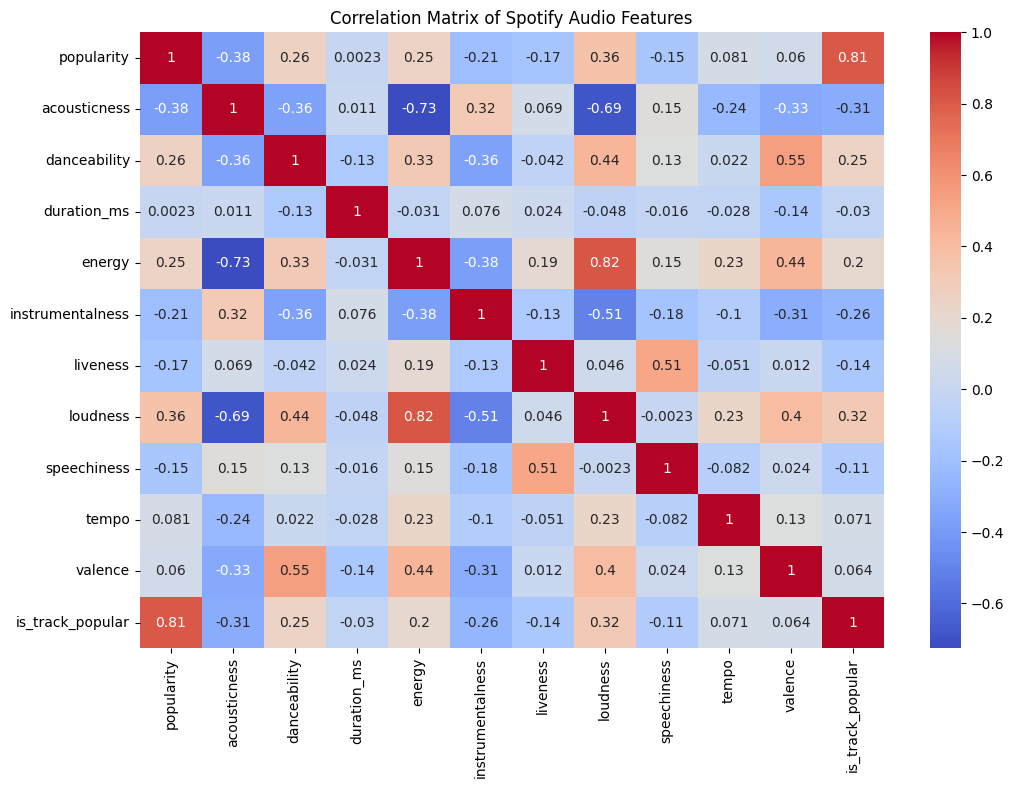

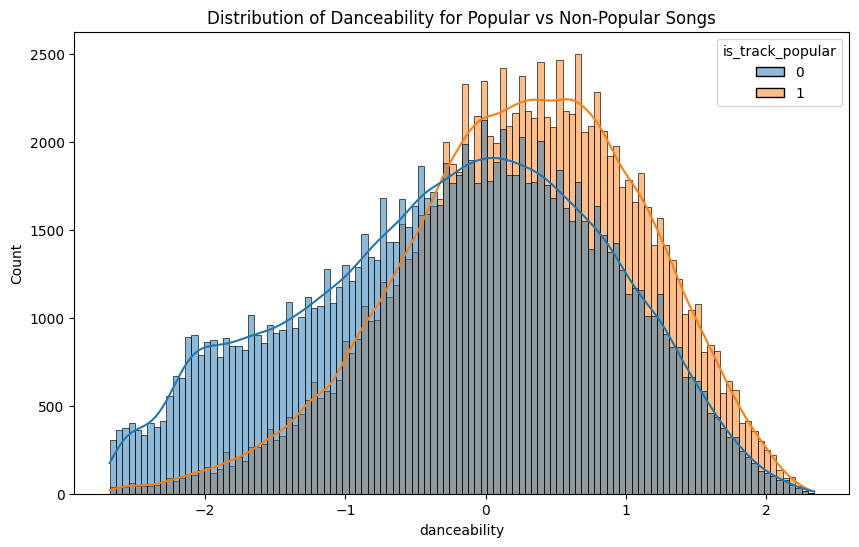

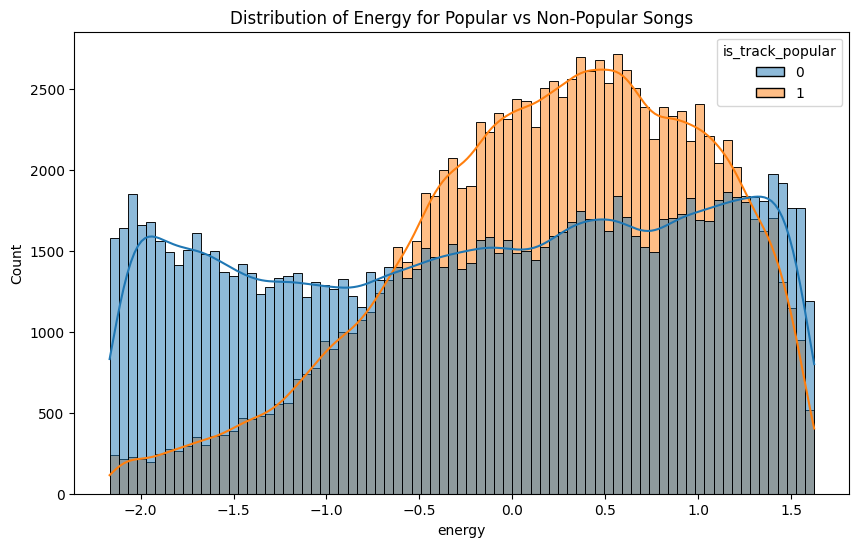

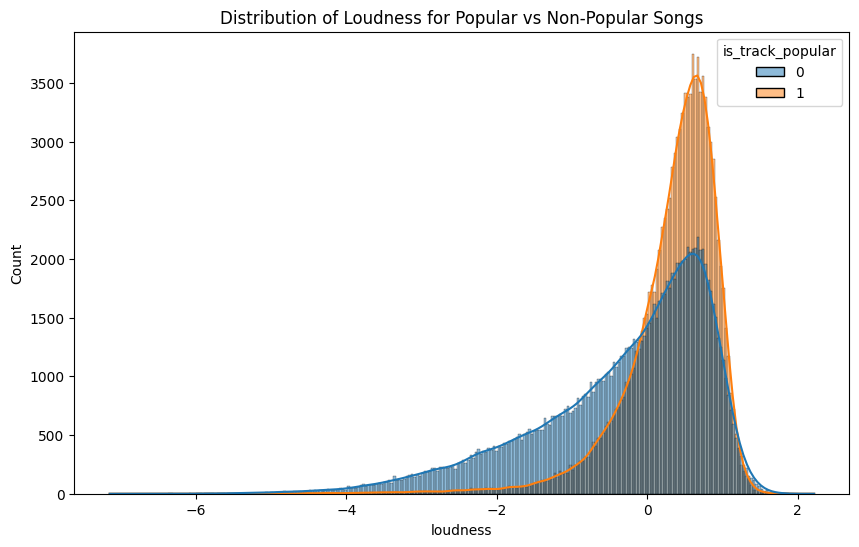

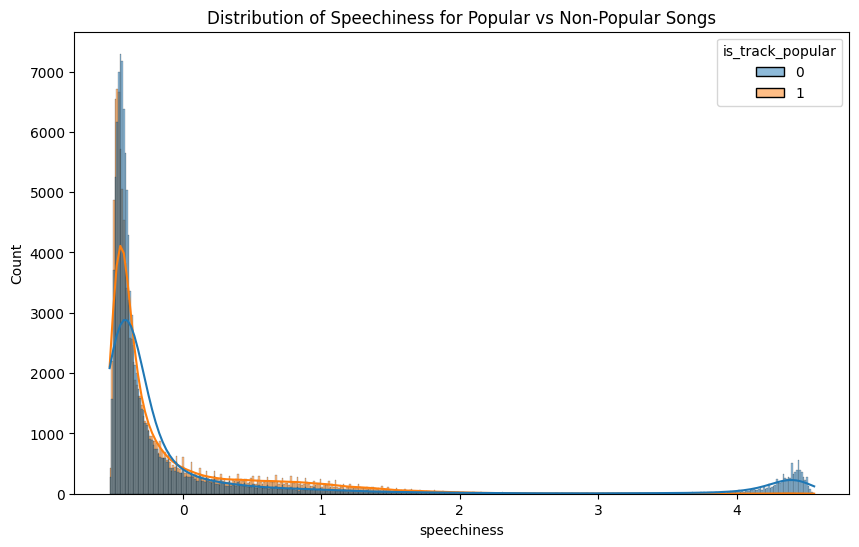

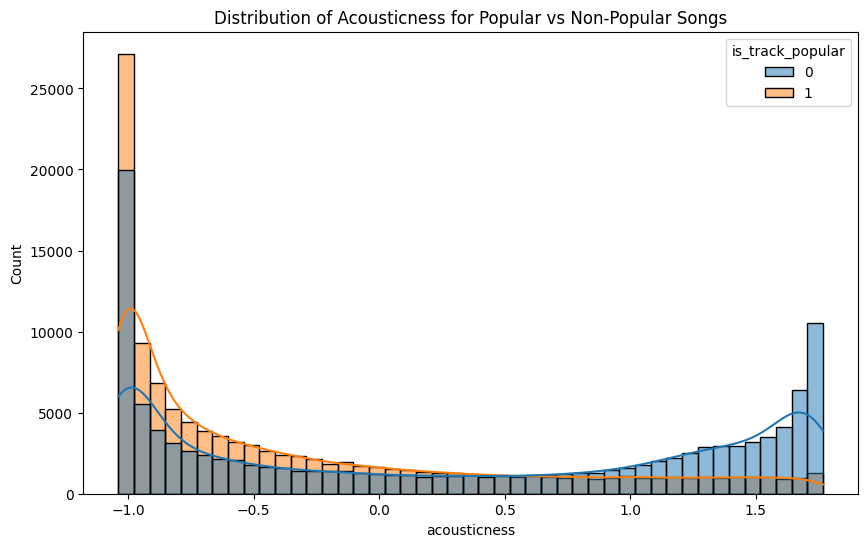

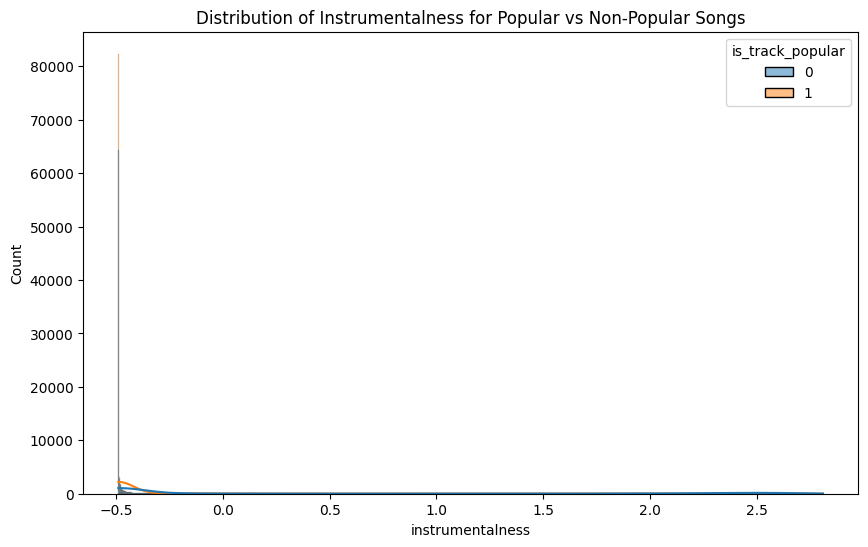

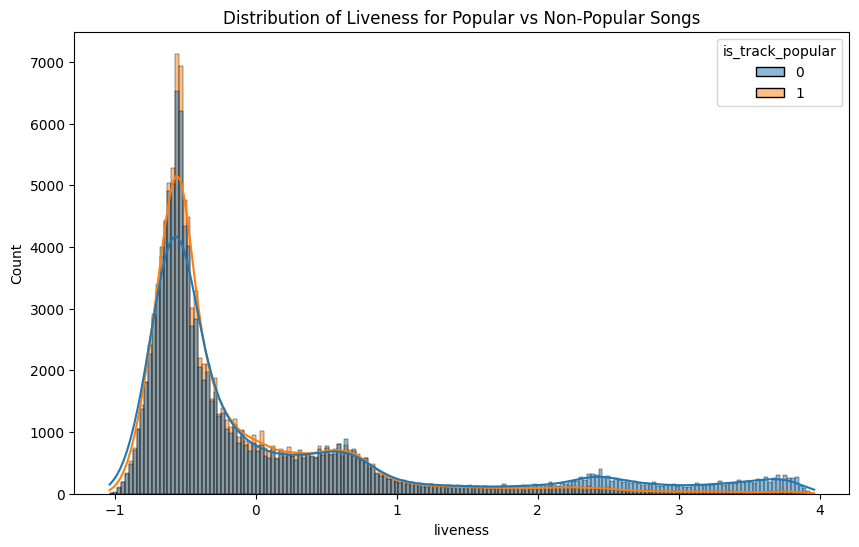

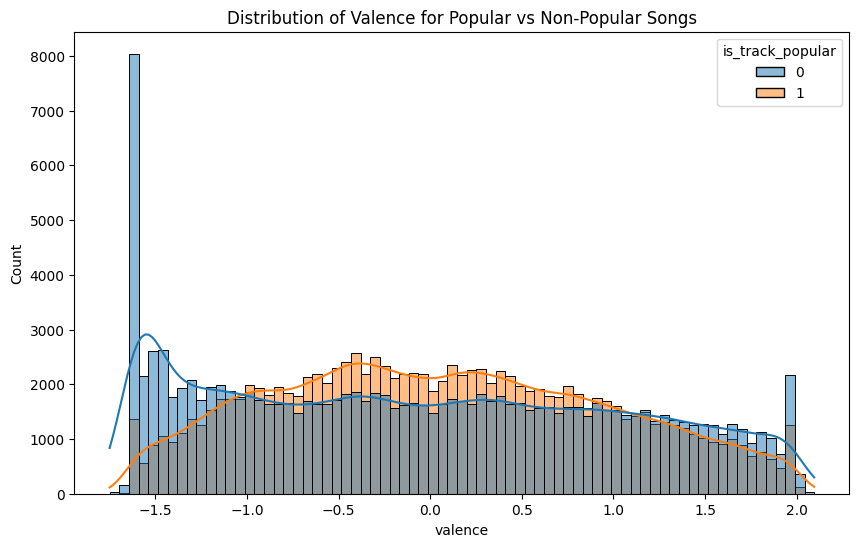

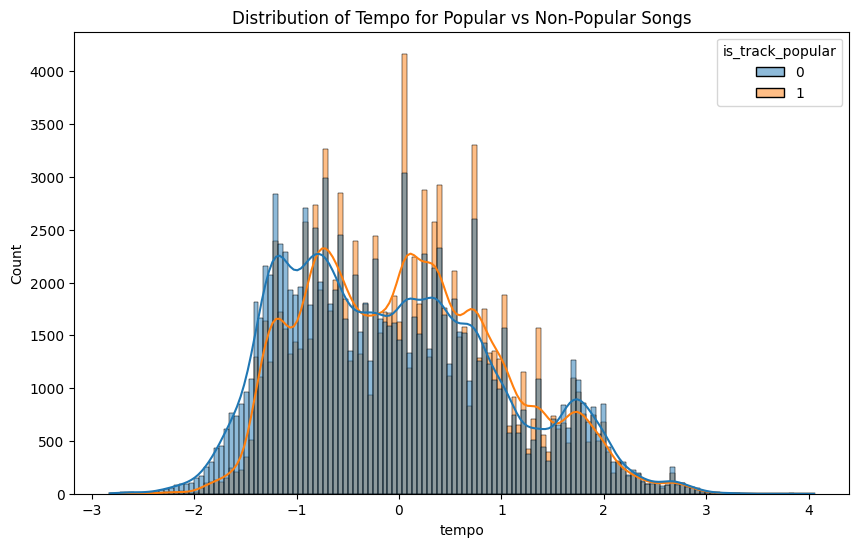

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming spotify_df is your dataframe and audio_features is a list of the audio feature columns

# Step 1: Filter out non-numeric columns for the correlation matrix
numeric_df = spotify_df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix to explore relationships between variables
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Spotify Audio Features')
plt.show()

# Step 2: Ensure 'is_track_popular' is properly encoded for the distribution plots
# Check if 'is_track_popular' is binary or categorical, if not convert it accordingly
if spotify_df['is_track_popular'].dtype != 'int64' and spotify_df['is_track_popular'].dtype != 'float64':
    # Convert 'is_track_popular' to a binary column (1 for Popular, 0 for Non-Popular)
    spotify_df['is_track_popular'] = spotify_df['is_track_popular'].map({'Popular': 1, 'Non-Popular': 0})

# Distribution of audio_features for popular and non-popular songs
for feature in audio_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(spotify_df, x=feature, hue='is_track_popular', kde=True)
    plt.title(f'Distribution of {feature.capitalize()} for Popular vs Non-Popular Songs')
    plt.show()


## 4. Hypothesis Testing and Confidence Intervals

In [5]:

# Hypothesis Testing and Confidence Intervals for audio_features
for feature in audio_features:
    popular = spotify_df[spotify_df['is_track_popular'] == 1][feature]
    non_popular = spotify_df[spotify_df['is_track_popular'] == 0][feature]

    # T-test
    t_stat, p_val = stats.ttest_ind(popular, non_popular)
    print(f"T-test for {feature}: t-statistic = {t_stat}, p-value = {p_val}")

    # Checking for two-tailed test significance
    if p_val < 0.05:
        print(f"Reject the null hypothesis for {feature}: Significant difference exists.")
    else:
        print(f"Fail to reject the null hypothesis for {feature}.")

    # Confidence Interval for mean difference
    diff_mean = popular.mean() - non_popular.mean()
    conf_interval = stats.norm.interval(0.95, loc=diff_mean, scale=stats.sem(popular - non_popular))
    print(f"95% Confidence Interval for the difference in {feature}: {conf_interval}")


T-test for danceability: t-statistic = 123.17564864434175, p-value = 0.0
Reject the null hypothesis for danceability: Significant difference exists.
95% Confidence Interval for the difference in danceability: (nan, nan)
T-test for energy: t-statistic = 97.72256318973288, p-value = 0.0
Reject the null hypothesis for energy: Significant difference exists.
95% Confidence Interval for the difference in energy: (nan, nan)
T-test for loudness: t-statistic = 162.75361883482296, p-value = 0.0
Reject the null hypothesis for loudness: Significant difference exists.
95% Confidence Interval for the difference in loudness: (nan, nan)
T-test for speechiness: t-statistic = -54.55341425026804, p-value = 0.0
Reject the null hypothesis for speechiness: Significant difference exists.
95% Confidence Interval for the difference in speechiness: (nan, nan)
T-test for acousticness: t-statistic = -159.44910719185503, p-value = 0.0
Reject the null hypothesis for acousticness: Significant difference exists.
95% 

## 5. Parametric and Non-Parametric Tests

In [6]:

# Parametric and Non-Parametric Tests
for feature in audio_features:
    popular = spotify_df[spotify_df['is_track_popular'] == 1][feature]
    non_popular = spotify_df[spotify_df['is_track_popular'] == 0][feature]

    # Parametric test: T-test
    t_stat, p_val = stats.ttest_ind(popular, non_popular)
    print(f"T-test for {feature}: p-value = {p_val}")

    # Non-parametric test: Mann-Whitney U test
    u_stat, u_p_val = stats.mannwhitneyu(popular, non_popular)
    print(f"Mann-Whitney U Test for {feature}: p-value = {u_p_val}")


T-test for danceability: p-value = 0.0
Mann-Whitney U Test for danceability: p-value = 0.0
T-test for energy: p-value = 0.0
Mann-Whitney U Test for energy: p-value = 0.0
T-test for loudness: p-value = 0.0
Mann-Whitney U Test for loudness: p-value = 0.0
T-test for speechiness: p-value = 0.0
Mann-Whitney U Test for speechiness: p-value = 0.1175724865217963
T-test for acousticness: p-value = 0.0
Mann-Whitney U Test for acousticness: p-value = 0.0
T-test for instrumentalness: p-value = 0.0
Mann-Whitney U Test for instrumentalness: p-value = 0.0
T-test for liveness: p-value = 0.0
Mann-Whitney U Test for liveness: p-value = 5.073802754464611e-273
T-test for valence: p-value = 2.3498974733124737e-207
Mann-Whitney U Test for valence: p-value = 3.815304781835468e-256
T-test for tempo: p-value = 2.4564662214976045e-259
Mann-Whitney U Test for tempo: p-value = 0.0


## 6. Type I and Type II Errors

In [7]:

# Estimating Type I and Type II Errors
alpha = 0.05  # significance level
for feature in audio_features:
    popular = spotify_df[spotify_df['is_track_popular'] == 1][feature]
    non_popular = spotify_df[spotify_df['is_track_popular'] == 0][feature]

    t_stat, p_val = stats.ttest_ind(popular, non_popular)

    if p_val < alpha:
        print(f"Type I Error (False Positive) risk for {feature}: {1 - p_val}")
    else:
        print(f"Type II Error (False Negative) risk for {feature}: {p_val}")


Type I Error (False Positive) risk for danceability: 1.0
Type I Error (False Positive) risk for energy: 1.0
Type I Error (False Positive) risk for loudness: 1.0
Type I Error (False Positive) risk for speechiness: 1.0
Type I Error (False Positive) risk for acousticness: 1.0
Type I Error (False Positive) risk for instrumentalness: 1.0
Type I Error (False Positive) risk for liveness: 1.0
Type I Error (False Positive) risk for valence: 1.0
Type I Error (False Positive) risk for tempo: 1.0


## 7. Regression Analysis with Cross-Validation

In [8]:

# Regression Analysis: Predicting popularity using different regression models

# Prepare the data for modeling
X = spotify_df[audio_features]
y = spotify_df['popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Lasso Regression model
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# Cross-validation on Linear Regression
cross_val_scores = cross_val_score(linear_model, X, y, cv=5)
print(f"Cross-Validation Scores for Linear Regression: {cross_val_scores}")
print(f"Mean CV Score: {np.mean(cross_val_scores)}")

# Predict on the test set and evaluate models
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate models
print(f"Linear Regression R^2 Score: {r2_score(y_test, y_pred_linear)}")
print(f"Ridge Regression R^2 Score: {r2_score(y_test, y_pred_ridge)}")
print(f"Lasso Regression R^2 Score: {r2_score(y_test, y_pred_lasso)}")


Cross-Validation Scores for Linear Regression: [-0.08490218  0.18510926  0.22277299  0.24900104  0.02040579]
Mean CV Score: 0.11847737963342728
Linear Regression R^2 Score: 0.2346963071152387
Ridge Regression R^2 Score: 0.23469628379306973
Lasso Regression R^2 Score: 0.2346815604629311


## 8. Residual Analysis

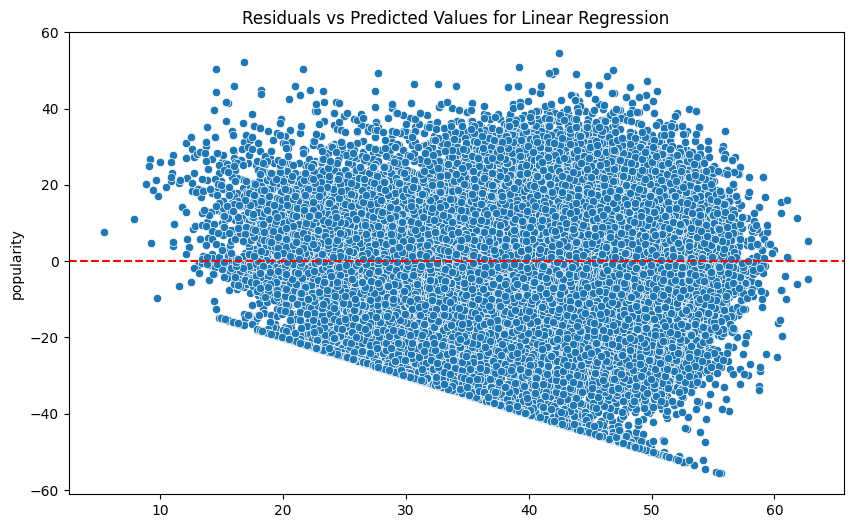

In [9]:

# Residuals for Linear Regression model
residuals = y_test - y_pred_linear

# Residual Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_linear, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values for Linear Regression')
plt.show()


## 9. Variance Inflation Factor (VIF)

In [10]:

# Calculate VIF to check for multicollinearity
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


            Feature       VIF
0      danceability  1.848567
1            energy  4.974903
2          loudness  4.189293
3       speechiness  1.669417
4      acousticness  2.762536
5  instrumentalness  1.488071
6          liveness  1.459234
7           valence  1.696855
8             tempo  1.095171


## 10. Conclusion

In [11]:

# Conclusion:
# 1. Based on hypothesis tests and confidence intervals, audio_features such as energy and danceability show significant differences.
# 2. Regression analysis, combined with cross-validation, highlighted that audio audio_features predict song popularity with varying degrees of accuracy.
# 3. Further improvements could include trying non-linear models such as Random Forests or Gradient Boosting for better accuracy.


#1. Fixing Correlation Matrix (as explained previously)

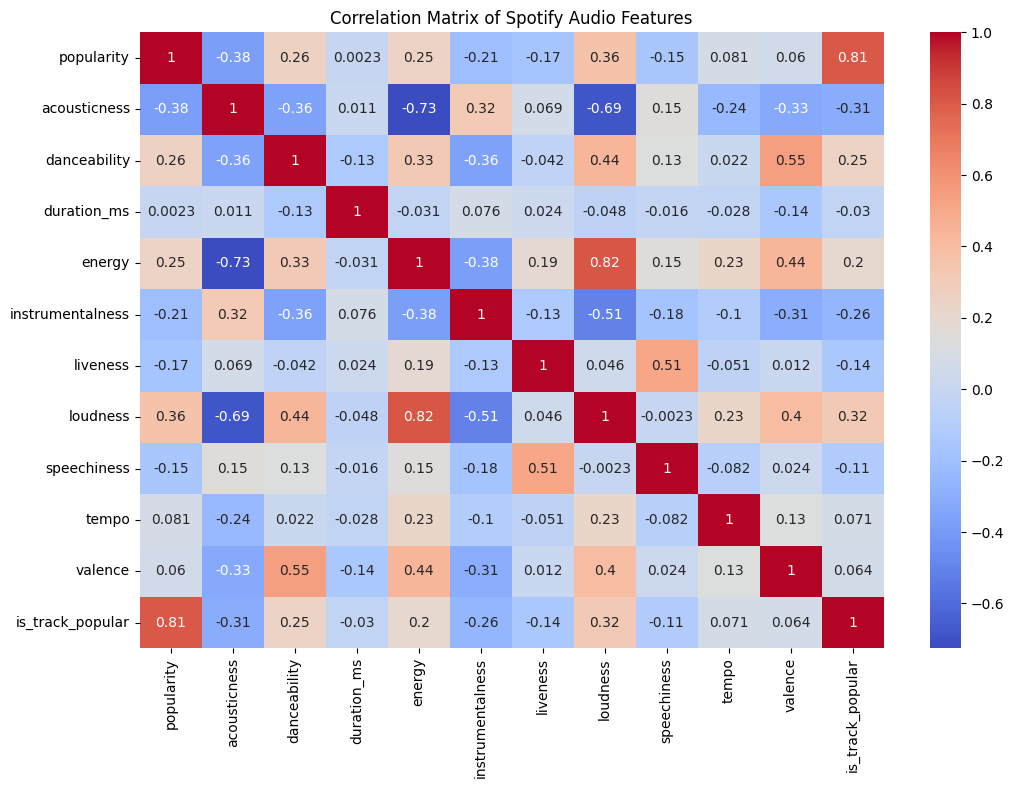

In [12]:
# Select only numeric columns for correlation matrix
numeric_spotify_df = spotify_df.select_dtypes(include=[np.number])

# Correlation matrix to explore relationships between numeric variables
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_spotify_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Spotify Audio Features')
plt.show()


#2. Check for Normality Assumptions
Before running parametric tests like t-tests, we need to check whether the features follow a normal distribution. We'll use the Shapiro-Wilk test for this.

In [13]:
# Check normality of each feature using Shapiro-Wilk test
from scipy.stats import shapiro

for feature in audio_features:
    stat, p = shapiro(spotify_df[feature])
    print(f'Shapiro-Wilk Test for {feature}: stat = {stat}, p-value = {p}')

    if p < 0.05:
        print(f"{feature} is NOT normally distributed (reject null hypothesis).")
    else:
        print(f"{feature} is normally distributed (fail to reject null hypothesis).")


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 232724.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test for danceability: stat = 0.9840166070717282, p-value = 3.604382474588254e-81
danceability is NOT normally distributed (reject null hypothesis).
Shapiro-Wilk Test for energy: stat = 0.9587575028134743, p-value = 5.9595175671075395e-105
energy is NOT normally distributed (reject null hypothesis).
Shapiro-Wilk Test for loudness: stat = 0.8514202310711108, p-value = 4.696360834347859e-142
loudness is NOT normally distributed (reject null hypothesis).
Shapiro-Wilk Test for speechiness: stat = 0.5094871568513359, p-value = 9.381105626707092e-182
speechiness is NOT normally distributed (reject null hypothesis).
Shapiro-Wilk Test for acousticness: stat = 0.8479396896591892, p-value = 8.893630073188072e-143
acousticness is NOT normally distributed (reject null hypothesis).
Shapiro-Wilk Test for instrumentalness: stat = 0.5337737877218025, p-value = 5.76561758133473e-180
instrumentalness is NOT normally distributed (reject null hypothesis).
Shapiro-Wilk Test for liveness: stat 

#3. Removing Outliers
Outliers can distort the results of statistical tests and models. We'll detect and remove outliers using the Z-score method.

In [14]:
# Detect and remove outliers using Z-score
from scipy import stats

# Set threshold for Z-score
z_threshold = 3

# Filter out rows where any feature's Z-score exceeds the threshold
spotify_df_clean = spotify_df[(np.abs(stats.zscore(spotify_df[audio_features])) < z_threshold).all(axis=1)]

# Check the size before and after removing outliers
print(f"Original dataset size: {spotify_df.shape[0]}")
print(f"Dataset size after removing outliers: {spotify_df_clean.shape[0]}")


Original dataset size: 232724
Dataset size after removing outliers: 215507


#4. Hypothesis Testing Revisited
Now that we have checked for normality and cleaned the data, we can perform hypothesis testing. We'll perform both parametric (t-test) and non-parametric (Mann-Whitney U test) tests to compare popular and non-popular songs.

In [15]:
# Hypothesis Testing with parametric and non-parametric methods
from scipy.stats import ttest_ind, mannwhitneyu

for feature in audio_features:
    popular = spotify_df_clean[spotify_df_clean['is_track_popular'] == 1][feature]
    non_popular = spotify_df_clean[spotify_df_clean['is_track_popular'] == 0][feature]

    # Parametric test: T-test
    t_stat, p_val = ttest_ind(popular, non_popular)
    print(f"T-test for {feature}: t-statistic = {t_stat}, p-value = {p_val}")

    # Non-parametric test: Mann-Whitney U test
    u_stat, u_p_val = mannwhitneyu(popular, non_popular)
    print(f"Mann-Whitney U Test for {feature}: statistic = {u_stat}, p-value = {u_p_val}")


T-test for danceability: t-statistic = 114.28872914751203, p-value = 0.0
Mann-Whitney U Test for danceability: statistic = 7259697530.5, p-value = 0.0
T-test for energy: t-statistic = 97.23295248497313, p-value = 0.0
Mann-Whitney U Test for energy: statistic = 6969641299.5, p-value = 0.0
T-test for loudness: t-statistic = 149.9667669469597, p-value = 0.0
Mann-Whitney U Test for loudness: statistic = 7542282738.5, p-value = 0.0
T-test for speechiness: t-statistic = 54.13345424216925, p-value = 0.0
Mann-Whitney U Test for speechiness: statistic = 6308287812.0, p-value = 3.0928263240058934e-277
T-test for acousticness: t-statistic = -128.54481565608637, p-value = 0.0
Mann-Whitney U Test for acousticness: statistic = 4310183984.0, p-value = 0.0
T-test for instrumentalness: t-statistic = -133.21019666292392, p-value = 0.0
Mann-Whitney U Test for instrumentalness: statistic = 4158619636.0, p-value = 0.0
T-test for liveness: t-statistic = -15.17066587630163, p-value = 5.88469770549032e-52
Man

#5. Advanced Feature Selection: Recursive Feature Elimination (RFE)
We can use Recursive Feature Elimination (RFE) to rank the features based on their importance in predicting song popularity.

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Select audio_features using RFE
rfe = RFE(estimator=logreg, n_features_to_select=5)  # Select the top 5 audio features
rfe = rfe.fit(spotify_df_clean[audio_features], spotify_df_clean['is_track_popular'])

# Display the ranking of the audio features
print("Feature Ranking (1 = most important):")
for i in range(len(audio_features)):
    print(f"{audio_features[i]}: Rank {rfe.ranking_[i]}")



Feature Ranking (1 = most important):
danceability: Rank 1
energy: Rank 1
loudness: Rank 1
speechiness: Rank 3
acousticness: Rank 2
instrumentalness: Rank 1
liveness: Rank 4
valence: Rank 1
tempo: Rank 5


#6. Advanced Model: Random Forest
After selecting features, we apply Random Forest, a powerful machine learning model for classification tasks. We’ll evaluate the performance using metrics such as accuracy, precision, recall, and F1 score.

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prepare the data
X = spotify_df_clean[audio_features]
y = spotify_df_clean['is_track_popular']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Random Forest Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Random Forest Performance:
Accuracy: 0.7908913739501647
Precision: 0.7800318551429289
Recall: 0.831731843575419
F1 Score: 0.8050526680077001


#7. Model Interpretation: Feature Importance in Random Forest
After training the Random Forest model, we can interpret it by examining feature importance.

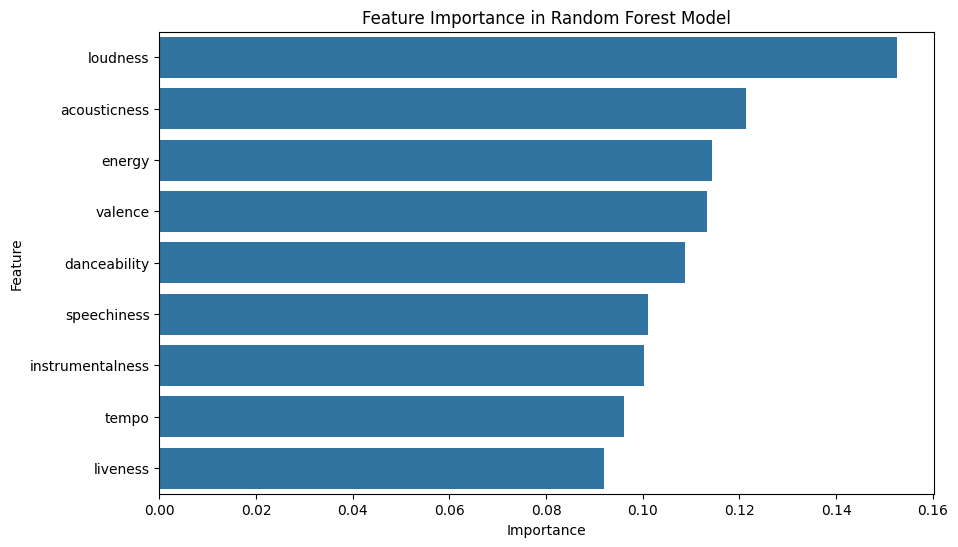

In [18]:
# Get feature importances from the trained model
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': audio_features, 'Importance': importances})

# Sort the audio_features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance in Random Forest Model')
plt.show()


#9. Confusion Matrix for Model Evaluation
To better evaluate the performance of our Random Forest model, we generate a confusion matrix.

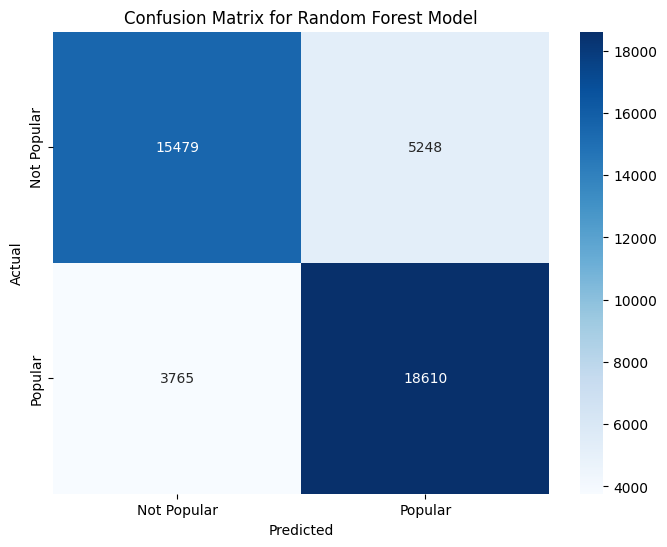

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Popular", "Popular"], yticklabels=["Not Popular", "Popular"])
plt.title("Confusion Matrix for Random Forest Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#10. Hyperparameter Tuning: Grid Search for Random Forest
We use Grid Search to tune the hyperparameters of our Random Forest model for better performance.

#11. ROC Curve for Model Evaluation
We'll evaluate the model using an ROC Curve, which shows the trade-off between sensitivity and specificity.

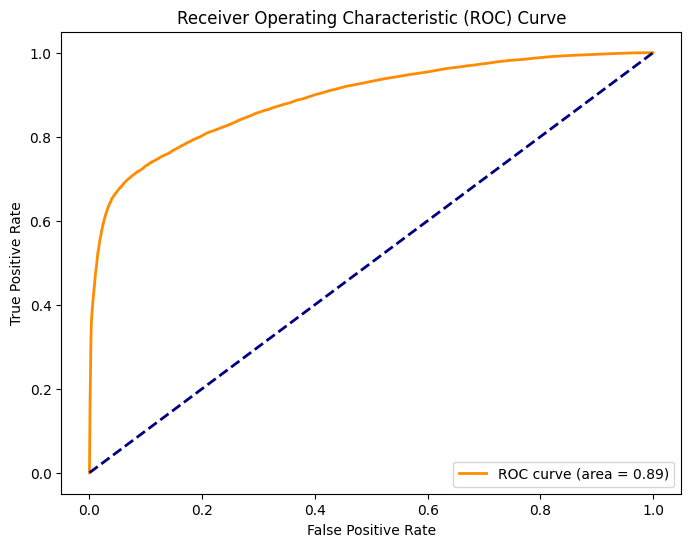

In [21]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for ROC curve
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#12. K-Means Clustering (Unsupervised Learning)
To explore clustering behavior, we apply K-Means Clustering to group similar songs based on their audio features.

<ipython-input-22-c6715cc9cce4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df_clean['Cluster'] = kmeans.fit_predict(spotify_df_clean[audio_features])
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


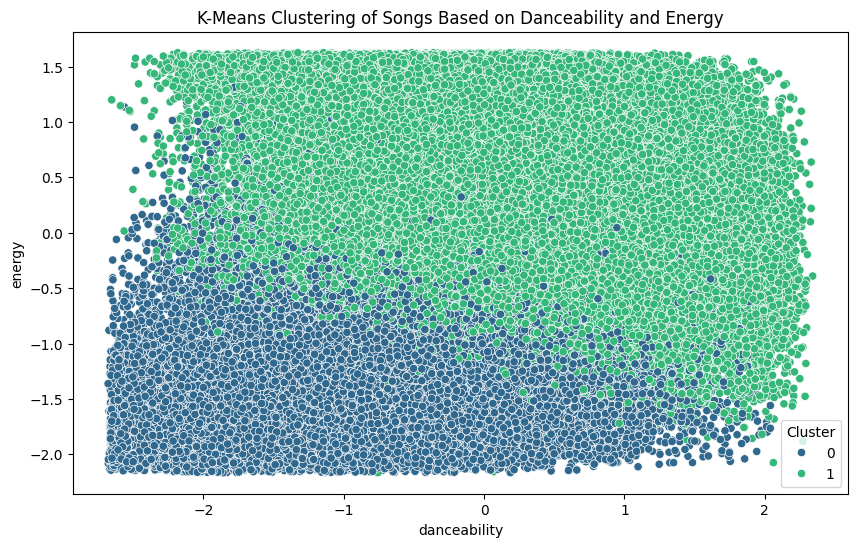

In [22]:
from sklearn.cluster import KMeans

# Fit K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
spotify_df_clean['Cluster'] = kmeans.fit_predict(spotify_df_clean[audio_features])

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='energy', hue='Cluster', data=spotify_df_clean, palette='viridis')
plt.title('K-Means Clustering of Songs Based on Danceability and Energy')
plt.show()


#13. Silhouette Score for Cluster Evaluation
To evaluate the clustering performance, we use the Silhouette Score, which measures how similar each point is to its own cluster compared to other clusters.

#14. Decision Tree for Song Popularity Prediction
We can also train a Decision Tree to predict song popularity.

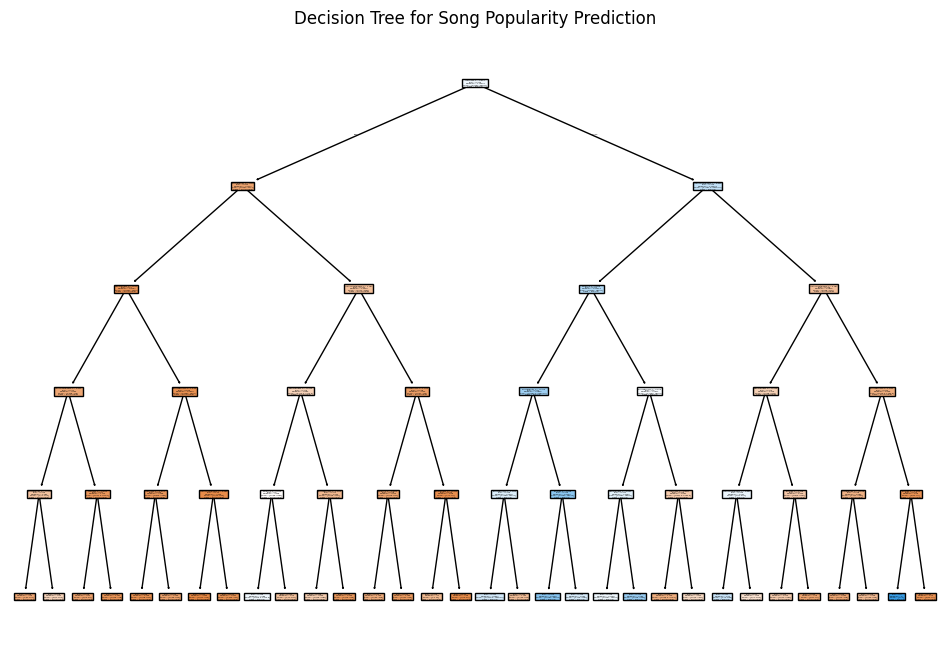

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Train a Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=audio_features, class_names=['Not Popular', 'Popular'], filled=True)
plt.title('Decision Tree for Song Popularity Prediction')
plt.show()


#15. Principal Component Analysis (PCA) for Dimensionality Reduction
We use PCA to reduce the dimensionality of the dataset while preserving most of the variance.

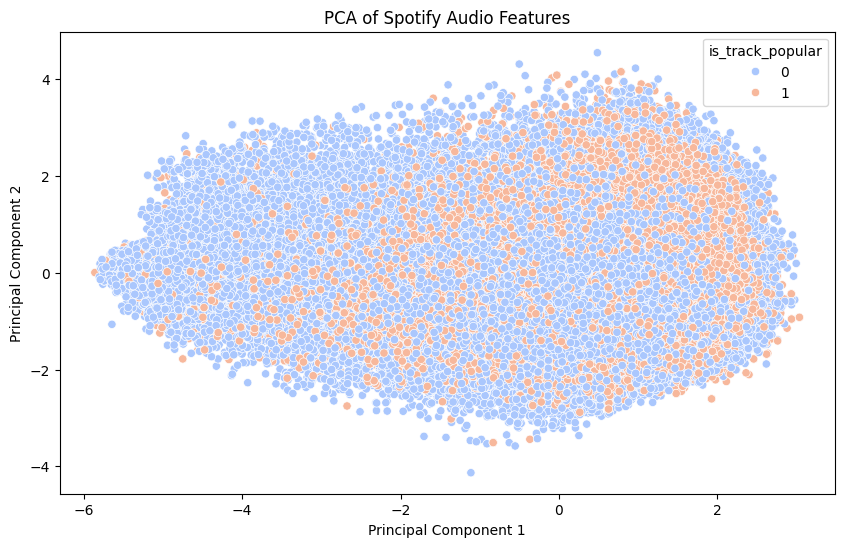

Explained Variance by Principal Components: [0.42745837 0.1494483 ]


In [25]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm')
plt.title('PCA of Spotify Audio Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Print explained variance ratio
print(f"Explained Variance by Principal Components: {pca.explained_variance_ratio_}")
